In [35]:
from sympy import *
from sympy.vector import Vector
from sympy.vector import CoordSys3D
N = CoordSys3D('N')

t, k, a = symbols( 't k a' )
init_printing(use_unicode=True)

# Define a vector which is not parallel to any edge vector (non-degeneracy), which will eventually be sent to zero:

Phi = t*(N.i + 2*N.j)

# Set the fixed points of the action; P denotes those that belong
# to the core, and Q those that come from the cut extended core:

# Define the interior points which make up the vertices to the core:

def P12(k,a):
    return Vector.zero

def P23(k,a):
    return k*N.i

def P34(k,a):
    return k*N.i + k*N.j

def P14(k,a):
    return k*N.j

# Exterior points coming from the cut:

def Q12_1(k,a):
    return -a*N.j

def Q12_2(k,a):
    return -a*N.i

def Q23_2(k,a):
    return (k+a)*N.i

def Q23_3(k,a):
    return k*N.i - a*N.j

def Q34_3(k,a):
    return k*N.i + (k+a)*N.j

def Q34_4(k,a):
    return (k+a)*N.i + k*N.j

def Q14_1(k,a):
    return (k+a)*N.j

def Q14_4(k,a):
    return -a*N.i + k*N.i

# Basis for the edge/weight vectors for the points 

v1 = N.i

v2 = N.j

# Define the term which is summed over each fixed point,
# representing the character for the representation

def f(P, edge1, edge2):
    return exp( Phi.dot(P) ) / ( (1 - exp( Phi.dot(edge1) ) ) * ( 1 - exp( Phi.dot(edge2) ) ) )

def g(P, edge1, edge2, edge3, edge4):
    return exp( Phi.dot(P) ) / ( (1 - exp( Phi.dot(edge1) ) ) * ( 1 - exp( Phi.dot(edge2) ) ) * ( 1 - exp( Phi.dot(edge3) ) ) * ( 1 - exp( Phi.dot(edge4) ) ) )

# For each of the right-angled triangles:
# Delta34 is the bottom-left simplex:

def Delta34(k,a):
    return f( 0*v1 + 0*v2, v1, v2 ) * ( f( 0*v1 + 0*v2, -v1, -v2 ) + f( -a*v1, v1, v1 - v2 ) + f( -a*v2, v2, -v1 + v2 ) )

# Delta14 is the bottom-right simplex:

def Delta14(k,a):
    return f( k*v1, -v1, v2 ) * ( f( 0*v1 + 0*v2, v1, -v2 ) + f( a*v1, -v1, -v1 - v2 ) + f( -a*v2, v1 + v2, v2 ) )

# Delta12 is the top-right simplex:

def Delta12(k,a):
    return f( k*v1 + k*v2, -v1 , -v2 ) * ( f( 0*v1 + 0*v2, v1, v2 ) + f( a*v1, -v1 + v2, -v1 ) + f( a*v2, -v2, v1 - v2 ) )

# Delta23 is the top-left simplex:

def Delta23(k,a):
    return f( k*v2, v1 , -v2 ) * ( f( 0*v1 + 0*v2, -v1, v2 ) + f( -a*v1, v1, v1 + v2 ) + f( a*v2, -v2, -v1 - v2 ) )

# And their sum:

def Sum(k,a):
    return Delta34(k,a) + Delta14(k,a) + Delta12(k,a) + Delta23(k,a)

# Take the limit as t -> 0 to get the Euler characteristic(?):

def Euler(k,a):
    return limit(Sum(k,a),t,0)

# The difference between successive levels for k greater than or equal to one:

def Difference(k,a):
    return Euler(k,a) - Euler(k,a-1)


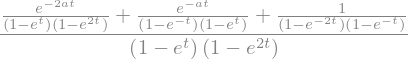

In [21]:
Delta34(k,a) # The bottom-left simplex

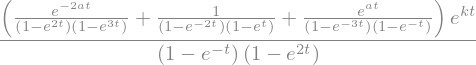

In [22]:
Delta14(k,a) # The bottom-right simplex

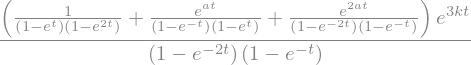

In [23]:
Delta12(k,a) # The top-right simplex

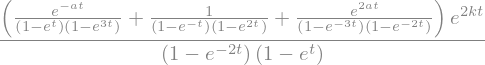

In [26]:
Delta23(k,a) # The top-left simplex

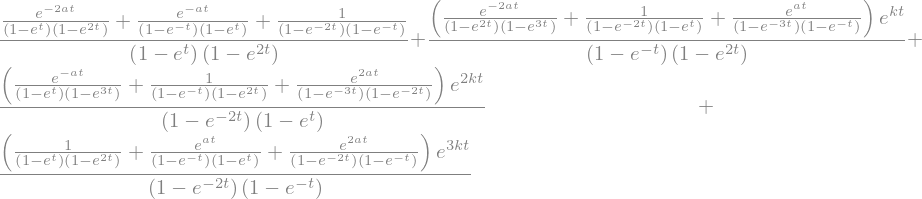

In [27]:
Sum(k,a) # Take their sum

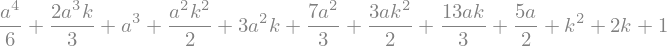

In [28]:
Euler(k,a) # And let ϕ tend to zero

In [30]:
Euler(k,0) # Calculation for the standard toric CP1 X CP1, which equals the number of lattice points in the square of side length k, which equals (k+1)^{2}

In [37]:
Euler(1,1)